In [1]:
import rdkit.Chem.AllChem as rdkit
from rdkit.Chem import AllChem
import copy
import stk
import os
import py3Dmol

import pandas as pd
import json
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit import rdBase
import os,time
print( time.asctime())
print(rdBase.rdkitVersion)

Wed Jun 18 13:46:42 2025
2025.03.2


In [2]:
df = pd.read_csv('PubChem_compound_text_Acrylate.csv')
df.head()

,cid,cmpdname,cmpdsynonym,mw,mf,polararea,complexity,xlogp,heavycnt,hbonddonor,...,gpidcnt,gpfamilycnt,meshheadings,annothits,annothitcnt,aids,cidcdate,sidsrcname,depcatg,annotation
0,6581,Acrylic acid,ACRYLIC ACID|2-Propenoic acid|79-10-7|prop-2-e...,72.060,C3H4O2,37.3,55.9,0.3,5,1,...,464476,263916,NaN,Biological Test Results|Interactions and Pathw...,18,155|157|161|165|167|175|192|248|256|328|880|11...,20040916,001Chemical|10X CHEM|1st Scientific|3B Scienti...,Chemical Vendors|Curation Efforts|Governmental...,D001697 - Biomedical and Dental Materials > D0...
1,13165,2-Hydroxyethyl acrylate,2-HYDROXYETHYL ACRYLATE|818-61-1|Hydroxyethyl ...,116.110,C5H8O3,46.5,87.7,-0.2,8,1,...,23270,12260,NaN,Biological Test Results|Interactions and Pathw...,17,421|426|427|433|434|435|445|530|540|541|542|54...,20050327,001Chemical|10X CHEM|3B Scientific (Wuhan) Cor...,Chemical Vendors|Curation Efforts|Governmental...,NaN
2,5355130,Octinoxate,Octinoxate|5466-77-3|83834-59-7|2-Ethylhexyl 4...,290.400,C18H26O3,35.5,304.0,5.3,21,0,...,61231,19797,NaN,Biological Test Results|Interactions and Pathw...,17,880|1469|1471|1479|1487|1490|1688|1766|1768|25...,20050326,001Chemical|10X CHEM|3B Scientific (Wuhan) Cor...,Chemical Vendors|Curation Efforts|Governmental...,C1892 - Chemopreventive Agent > C851 - Sunscre...
3,8846,Butyl Acrylate,BUTYL ACRYLATE|141-32-2|n-Butyl acrylate|butyl...,128.169,C7H12O2,26.3,97.1,2.4,9,0,...,161905,68033,NaN,Biological Test Results|Chemical and Physical ...,16,421|426|427|433|434|435|445|530|540|541|542|54...,20040916,001Chemical|10X CHEM|1st Scientific|3B Scienti...,Chemical Vendors|Curation Efforts|Governmental...,NaN
4,8821,Ethyl acrylate,ETHYL ACRYLATE|140-88-5|Acrylic acid ethyl est...,100.120,C5H8O2,26.3,76.1,1.3,7,0,...,43681,22209,NaN,Biological Test Results|Interactions and Pathw...,16,421|426|427|433|434|435|445|530|540|541|542|54...,20050326,10X CHEM|1st Scientific|3B Scientific (Wuhan) ...,Chemical Vendors|Curation Efforts|Governmental...,D009676 - Noxae > D002273 - Carcinogens|D00967...


In [3]:
with open('pubchem_db.txt') as f:
    lines = f.readlines()
    
pubchem_cid = []
pubchem_smiles = []
pubchem_smiles_rep = []
for i in range(len(lines)):
    line = lines[i]
    pubchem_cid.append(line.split()[0])
    
    sm=line.split()[1]
    sm_rep = copy.copy(sm)
    #sm_rep = "[*]CC[*]"+sm_rep[3:]
    pubchem_smiles.append(sm)
    #pubchem_smiles_rep.append(sm_rep)

Name: Acrylic acid
Smiles: C=CC(=O)O


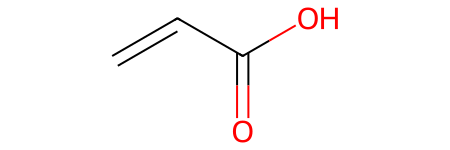

In [4]:
idd = 0
smlA = pubchem_smiles[idd]
nameA = df['cmpdname'][idd]
print('Name: '+nameA)

print('Smiles: '+smlA)
mA = Chem.MolFromSmiles(smlA)
mA

Name: Ethyl acrylate
Smiles: CCOC(=O)C=C


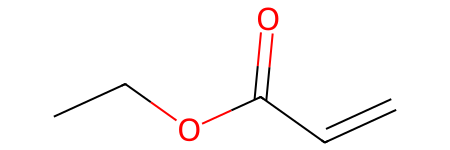

In [16]:
idd = 4
smlB = pubchem_smiles[idd]
nameB = df['cmpdname'][idd]
print('Name: '+nameB)

print('Smiles: '+smlB)
mB = Chem.MolFromSmiles(smlB)
mB

In [11]:
df[df['canonicalsmiles'] == 'C=CC(=O)OCCO']

,cid,cmpdname,cmpdsynonym,mw,mf,polararea,complexity,xlogp,heavycnt,hbonddonor,...,gpidcnt,gpfamilycnt,meshheadings,annothits,annothitcnt,aids,cidcdate,sidsrcname,depcatg,annotation
1,13165,2-Hydroxyethyl acrylate,2-HYDROXYETHYL ACRYLATE|818-61-1|Hydroxyethyl ...,116.11,C5H8O3,46.5,87.7,-0.2,8,1,...,23270,12260,NaN,Biological Test Results|Interactions and Pathw...,17,421|426|427|433|434|435|445|530|540|541|542|54...,20050327,001Chemical|10X CHEM|3B Scientific (Wuhan) Cor...,Chemical Vendors|Curation Efforts|Governmental...,NaN
9302,117064378,"Hydroxyethyl acrylate-1-13C, 2,3,3-d3, 97% (CP...","Hydroxyethyl acrylate-1-13C, 2,3,3-d3, 97% (CP...",120.13,C5H8O3,46.5,87.7,-0.2,8,1,...,0,0,NaN,NaN,0,NaN,20160130,Ambinter|Aurora Fine Chemicals LLC|Chemieliva ...,Chemical Vendors|Legacy Depositors,NaN


In [6]:
def replace_first_cce(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        raise ValueError("Invalid SMILES string")
    
    # Find the first C=C double bond
    for bond in mol.GetBonds():
        if bond.GetBondType() == Chem.BondType.DOUBLE:
            atom1 = bond.GetBeginAtom()
            atom2 = bond.GetEndAtom()
            if atom1.GetSymbol() == 'C' and atom2.GetSymbol() == 'C':
                # Instead of SMILES replacement, modify the molecule
                mol = Chem.RWMol(mol)
                bond.SetBondType(Chem.BondType.SINGLE)
                # Add Br atoms
                br1 = mol.AddAtom(Chem.Atom('Br'))
                br2 = mol.AddAtom(Chem.Atom('Br'))
                mol.AddBond(atom1.GetIdx(), br1, Chem.BondType.SINGLE)
                mol.AddBond(atom2.GetIdx(), br2, Chem.BondType.SINGLE)
                return Chem.MolToSmiles(mol)
    
    return smiles  # No double bond found, return original

fixed_monomer_1 = smlA
fixed_monomer_2 = smlB

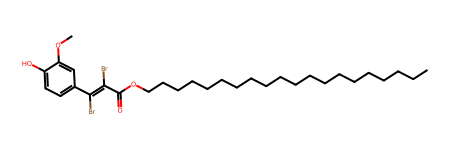

In [7]:
# Fix the fixed monomers smiles to bromo form
fixed1_bromo = replace_first_cce(fixed_monomer_1)
fixed2_bromo = replace_first_cce(fixed_monomer_2)
mB = Chem.MolFromSmiles(fixed2_bromo)
mB

In [8]:
bb1 = stk.BuildingBlock(fixed1_bromo, [stk.BromoFactory()])
bb2 = stk.BuildingBlock(fixed2_bromo, [stk.BromoFactory()])

polymer = stk.ConstructedMolecule(
    topology_graph=stk.polymer.Linear(
        building_blocks=(bb1, bb2),
        repeating_unit='AB',
        num_repeating_units=3,
        optimizer=stk.Collapser(scale_steps=False),
    ),
)

rdkit_polymer = polymer.to_rdkit_mol()
rdkit_polymer = Chem.AddHs(rdkit_polymer)
Chem.SanitizeMol(rdkit_polymer)

# Embed if necessary (sometimes stk embedding is enough, but we do ETKDG for 3D coords)
params = AllChem.ETKDGv3()
params.useRandomCoords = True
params.maxIterations = 1000
params.numThreads = 1
params.randomSeed = 42

AllChem.MMFFOptimizeMolecule(rdkit_polymer)

polymer = polymer.with_position_matrix(
    position_matrix=rdkit_polymer.GetConformer().GetPositions()
)

# Write XYZ file function unchanged
def write_xyz_file(mol, filename):
    conf = mol.GetConformer()
    num_atoms = mol.GetNumAtoms()
    with open(filename, 'w') as f:
        f.write(f"{num_atoms}\n")
        f.write(f"Molecule ID: {os.path.basename(filename).split('.')[0]}\n")
        for i in range(num_atoms):
            atom = mol.GetAtomWithIdx(i)
            pos = conf.GetAtomPosition(i)
            symbol = atom.GetSymbol()
            f.write(f"{symbol} {pos.x:.6f} {pos.y:.6f} {pos.z:.6f}\n")

# Write .xyz file
xyz_filename = os.path.join('.', f"a.xyz")
write_xyz_file(polymer.to_rdkit_mol(), xyz_filename)
print(f"Saved copolymer: {xyz_filename}")

Saved copolymer: ./a.xyz


In [9]:
rdkit_polymer = polymer.to_rdkit_mol()
rdkit_polymer = AllChem.AddHs(rdkit_polymer)
rdkit.SanitizeMol(rdkit_polymer)

stk.MolWriter().write(polymer, 'polymer.mol')

rdkit_polymer_h = Chem.AddHs(rdkit_polymer)
params = AllChem.ETKDGv3()
params.useRandomCoords=True
AllChem.EmbedMolecule(rdkit_polymer_h, params);

params = AllChem.ETKDGv3()

rdkit_polymer_h = Chem.MolToMolBlock(rdkit_polymer_h)
p = py3Dmol.view(width=400,height=400)
p.removeAllModels()
p.addModel(rdkit_polymer_h,'sdf')
p.setStyle({'stick':{}})
p.zoomTo()
p.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.